

# Project: Investigate a Dataset - TMDB Movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project we'll be analyzing a movies dataset named TMDB Movies .This data set contains 10,866 rows and 21 columns.The dataset spans from 1960 to 2015

### Question(s) for Analysis
In this analysis, I  will answer the following questions:<br>
(1). Which  five genres is the most popular among people?<br>
(2). What were the top 5 most succesful genres in terms of revneue since 1960?<br>
(3). How has the number of movies produced change as the years go by?<br>
(4). What 5  movies have generated the most revnue since 1960?<br>
(5). Does popularity mean a moive will generate a lot of revnue?



In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [36]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [37]:
df= pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [39]:
df.shape

(10866, 21)

In [40]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> I indentified some inconsistency with the dataset and i am going to refectify them.<br> 
Things i am going to do:<br> 
(1).Replace some zero values with Null<br> 
(2) Remove Nulls<br> 
(3) Remove unnecessary columns<br> 
(4) Remove duplicates<br> 
(5)Change datatype of the release year column<br> 
(6) Delete some of the dates in the release year column that are invalid<br> 

 

### Deleting the unnecessary columns


In [41]:
# since we are not joining the data to another dataset having an id and imdb_id column is unnecessary
df.drop(['imdb_id', 'tagline', 'keywords', 'overview', 'homepage'], axis =1, inplace = True)

In [42]:
#Check if it was rectified
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


### Replacing zero values to Nulls

Having the value zero in the budget,revnue etc columns must have been an error from the source, we replace them so they can be dropped.

In [43]:
 
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

In [44]:
# checking the min values to see if this has been rectified
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,20669.000000,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,75610.000000,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Removing Nulls

Having nulls in our dataset will lead too inaccurate results ,its best we remove them 

In [45]:
df.isna().sum()


id                         0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [46]:
df.dropna(inplace = True)

In [47]:
# checking to see if this has been rectified
df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Removing Duplicates

In [48]:
sum(df.duplicated())


1

In [49]:
df.drop_duplicates(inplace = True)

In [50]:
# check to see if this has been rectified
sum(df.duplicated())

0

### Converting the release date column to date

In [51]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [52]:
# check to see if this has been rectified
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 16 columns):
id                      3805 non-null int64
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(3), object(5)
memory usage: 505.4+ KB


### Spilting the  genres columns  and picking the first

Picking the first names is based on the assumption the first name is the most important or the main

In [53]:
# Creating a function to split and extract the first name.

def split(new_col, col):
    
    df[new_col] = df[col].str.split(pat='|', expand = True)[0]


In [54]:

# Using the function on the desired columns to create new columns.

split('cast_1', 'cast')
split('director_1', 'director')
split('genre_1', 'genres')

In [55]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_1,director_1,genre_1
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Colin Trevorrow,Action
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,George Miller,Action
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Robert Schwentke,Adventure
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,J.J. Abrams,Action
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,James Wan,Action


<a id='eda'></a>
## Exploratory Data Analysis






### A histogram is used to acquire a fast understanding of the distribution across variables.

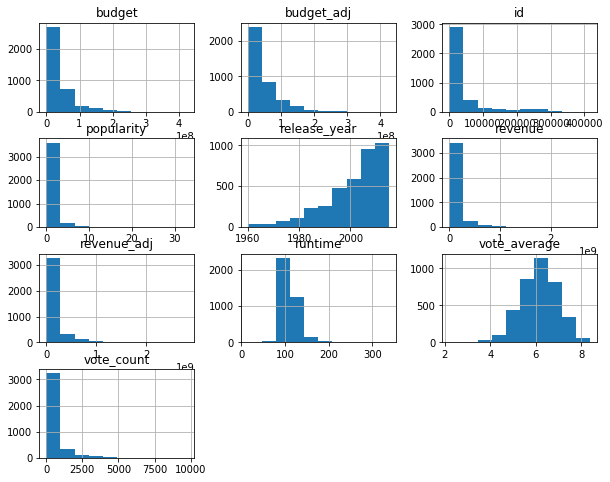

In [56]:
#viewing the distribution of some of the columns
df.hist(figsize=(10,8));

#### observation:

Except for the vote average and release year columns, the majority of the columns exhibit a right-skewed distribution.

### (1). Which  five genres is the most popular among people?<br>
We want to find out which movie genre is being talked about the most

In [57]:
gen_pop=df.groupby('genre_1').popularity.mean().nlargest(n=5)
gen_pop

genre_1
Science Fiction    1.931437
Adventure          1.915165
Animation          1.739861
War                1.658497
Family             1.609295
Name: popularity, dtype: float64

''

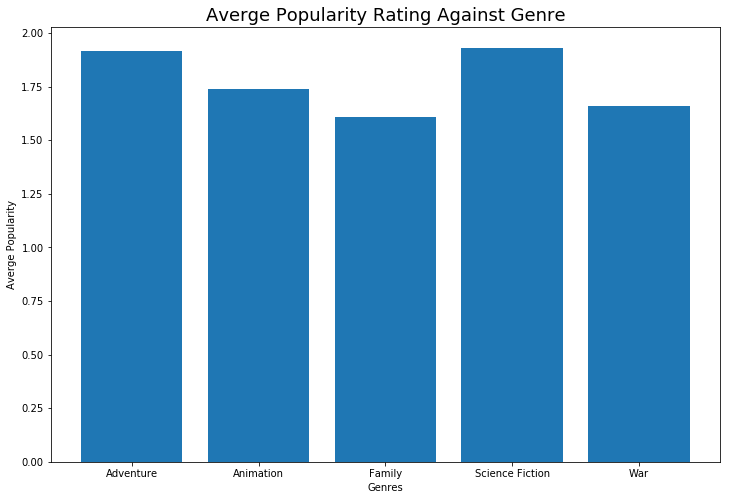

In [58]:
plt.figure(figsize=(12,8))
plt.bar(gen_pop.index,gen_pop)
plt.title('Averge Popularity Rating Against Genre',fontsize=18)
plt.xlabel('Genres')
plt.ylabel('Averge Popularity')
;

#### observation:

Based on this finding we can conclude science fiction movies are the most popular movie and most talked about among people

### (2). What were the top 5 most succesful genres in terms of revneue since 1960?<br>
I want to find out which movie genre since 1960 has been the most succesful in terms of revenue 

In [59]:
gen_rev=df.groupby('genre_1').revenue.sum().nlargest(n=5)
gen_rev


genre_1
Action       9.356185e+10
Adventure    7.180799e+10
Comedy       6.196278e+10
Drama        5.758626e+10
Animation    2.839315e+10
Name: revenue, dtype: float64

''

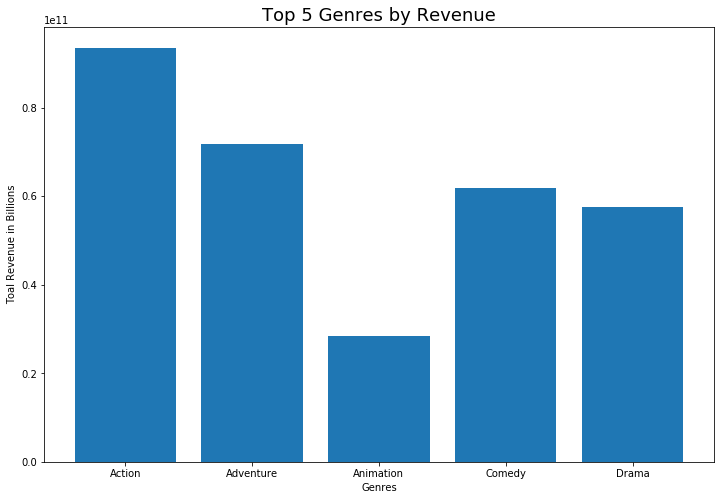

In [60]:
plt.figure(figsize=(12,8))
plt.bar(gen_rev.index,gen_rev)
plt.title('Top 5 Genres by Revenue',fontsize=18)
plt.xlabel('Genres')
plt.ylabel('Toal Revenue in Billions')
;

#### Observations:

Based on this analysis, it safe to say action movies has genrated the most revenue and the most succesful followed by adventure movies

### (3).  How has the number of movies produced change as the years go by?

What year have we seen that had the most release of movies

In [61]:
no_movies=df.groupby('release_year').id.count()
no_movies

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     47
1987     46
1988     56
1989     51
1990     52
1991     50
1992     53
1993     72
1994     61
1995     79
1996     84
1997     90
1998     90
1999    116
2000    104
2001    118
2002    125
2003    121
2004    142
2005    159
2006    168
2007    159
2008    161
2009    170
2010    177
2011    196
2012    157
2013    179
2014    165
2015    160
Name: id, dtype: int64

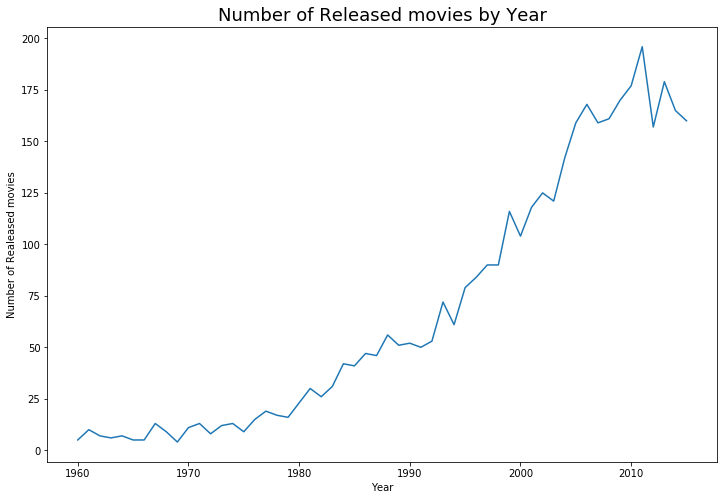

In [62]:
plt.figure(figsize=(12,8))
plt.plot(no_movies.index,no_movies)
plt.title('Number of Released movies by Year',fontsize=18)
plt.xlabel('Year')
plt.ylabel('Number of Realeased movies');

#### Observation:

Based on this analysis, 2011 was the year with the most release of movies

### (4). What 5  movies have generated the most revnue since 1960?

I want to find out which movie since 1960 has made the most revenue as success of a movie is determined by its revenue 

In [63]:
mov_rev=df.groupby('original_title').revenue.sum().nlargest(n=5)
mov_rev

original_title
Avatar                          2.781506e+09
Star Wars: The Force Awakens    2.068178e+09
Titanic                         1.845034e+09
The Avengers                    1.568081e+09
Jurassic World                  1.513529e+09
Name: revenue, dtype: float64

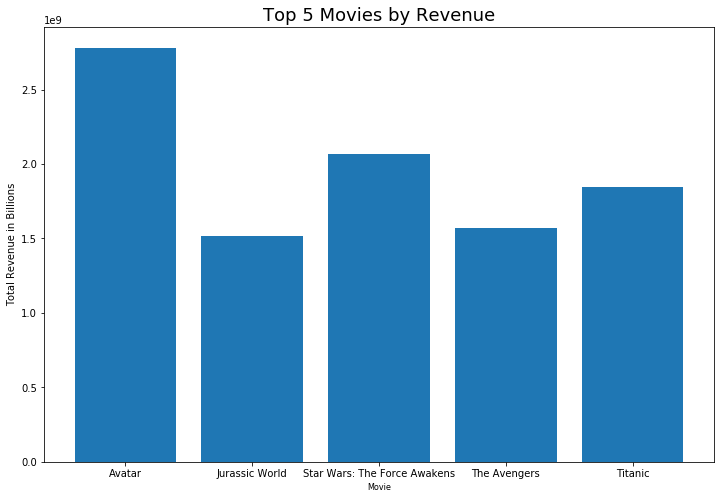

In [67]:
plt.figure(figsize=(12,8))
plt.bar(mov_rev.index,mov_rev)
plt.title('Top 5 Movies by Revenue',fontsize=18)
plt.xlabel('Movie',fontsize= 8)
plt.ylabel('Total Revenue in Billions');

#### Observation:


Based on this analysis, Avater has generated the most revenue since 1960 with over two billion

### (5). Does popularity mean a moive will generate a lot of revnue?

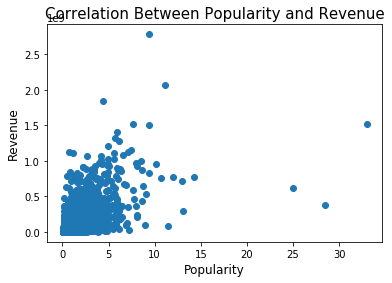

In [65]:

plt.scatter(df['popularity'],df['revenue']);

plt.title('Correlation Between Popularity and Revenue', fontsize = 15)
plt.xlabel('Popularity', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12);


#### Observation:

Based on this analysis, there is a corrlation between poplarity and revenue

<a id='conclusions'></a>
## Conclusions

After analysing the TMDB Movie dataset I have come to a conculsion on the following questions:<br>
(1). Which  five genres is the most popular among people?<br>
      The most popluar genres among people from 1960 to 2015 were Science Fiction,Adventure,Animation,War and Family with Science Fiction being the most popular with an average poplarity rating of 1.931437.<br>        
(2). What were the top 5 most succesful genres in terms of revneue since 1960?<br>
       In terms of revenue generated the top 5 genres  1960 to 2015 were Action,Adventure,Comedy,Drama and Animation action being the most successful.<br>
(3). How has the number of movies produced change as the years go by?<br>
        The analysis reveals that the number of movies released since 1960 has tremedoulsy increased having a peak in 2011 with 196 movies relased.<br>
(4). What 5  movies have generated the most revenue since 1960?<br>
      The movies that have genrated the most revenue since 1960 are  Avatar,Star Wars: The Force Awakens,Titanic,The Avengers and Jurassic World with Avatar generating the most.<br>
(5). Does popularity mean a moive will generate a lot of revnue?<br>
        Based on this analsysis , YES!, popularity showed a postive correlation to the revnue generated.

## Limitations
Results genrated are limited for various reasons,namely;<br>
- A significant portion of the dataset was dropped due to null values or zero values.
- Correlation doesnt mean causaution so a movie being popular might not always mean it will genrate a lot of revenue
- No advanced Statistics was conducted in the analysis
- The movies has multiple values for genres, casts and directors. I kept only the first names while others were dropped


In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0